In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow numpy pandas scikit-learn pillow


In [ ]:
from PIL import Image
import numpy as np
import os

def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')  # Ensure RGB format
    img = img.resize(target_size)
    img_data = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    return img_data

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = preprocess_image(img_path)
        images.append(img)
    return np.array(images)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

def train_autoencoder_model(images):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    model.compile(optimizer='adam', loss='binary_crossentropy')
    model.fit(images, images, epochs=15, batch_size=10, verbose=1)
    return model


In [ ]:
def encode_clothing_image(model, image):
    encoded_features = model.predict(np.expand_dims(image, axis=0))
    return encoded_features.flatten()




In [ ]:
import random
def recommend_outfits(encoded_items, image_data, outfit_count=3):
    # Group encoded items by category
    grouped_items = {category: [] for category in clothing_list}
    for category, encoded_item in encoded_items:
        grouped_items[category].append(encoded_item)

    # Create outfits with one of each category (bag, dress, earrings, rings, watches)
    recommendations = []
    bags = grouped_items["bag"].copy()
    dresses = grouped_items["dress"].copy()
    earrings = grouped_items["earrings"].copy()
    rings = grouped_items["rings"].copy()
    watches = grouped_items["watches"].copy()

    for _ in range(outfit_count):
        if bags and dresses and earrings and rings and watches:
            bag_index = random.randint(0, len(bags) - 1)
            dress_index = random.randint(0, len(dresses) - 1)
            earring_index = random.randint(0, len(earrings) - 1)
            ring_index = random.randint(0, len(rings) - 1)
            watch_index = random.randint(0, len(watches) - 1)

            bag = bags.pop(bag_index)
            dress = dresses.pop(dress_index)
            earring = earrings.pop(earring_index)
            ring = rings.pop(ring_index)
            watch = watches.pop(watch_index)

            recommendations.append([
                ("bag", bag),
                ("dress", dress),
                ("earrings", earring),
                ("rings", ring),
                ("watches", watch)
            ])
        else:
            break

    return recommendations

Epoch 1/15
3/3 [==============================] - 2s 57ms/step - loss: 0.6592
Epoch 2/15
3/3 [==============================] - 0s 53ms/step - loss: 0.5698
Epoch 3/15
3/3 [==============================] - 0s 41ms/step - loss: 0.5331
Epoch 4/15
3/3 [==============================] - 0s 40ms/step - loss: 0.4782
Epoch 5/15
3/3 [==============================] - 0s 40ms/step - loss: 0.4762
Epoch 6/15
3/3 [==============================] - 0s 41ms/step - loss: 0.4615
Epoch 7/15
3/3 [==============================] - 0s 40ms/step - loss: 0.4454
Epoch 8/15
3/3 [==============================] - 0s 41ms/step - loss: 0.4391
Epoch 9/15
3/3 [==============================] - 0s 40ms/step - loss: 0.4229
Epoch 10/15
3/3 [==============================] - 0s 42ms/step - loss: 0.4235
Epoch 11/15
3/3 [==============================] - 0s 41ms/step - loss: 0.4287
Epoch 12/15
3/3 [==============================] - 0s 42ms/step - loss: 0.4001
Epoch 13/15
3/3 [==============================] - 0s 40ms/st

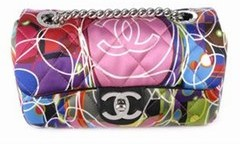

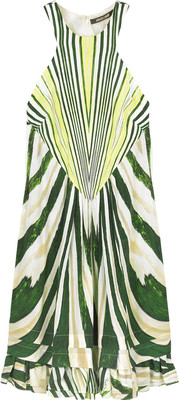

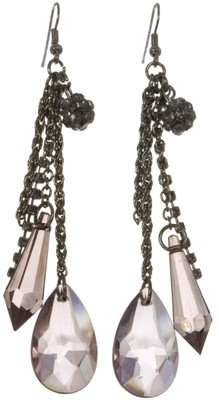

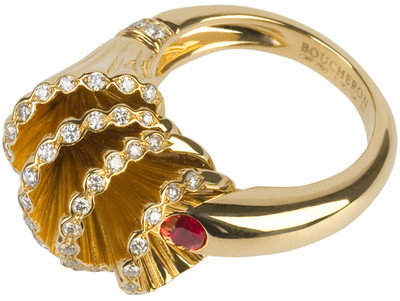

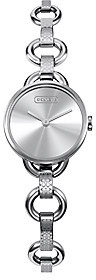

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from IPython.display import display, Image as IPImage
from sklearn.metrics.pairwise import cosine_similarity
import random

# Define clothing categories and load images
base_path = '/content/drive/MyDrive/PolyVore'
clothing_list = ["bag", "dress", "earrings", "rings", "watches"]
image_paths = {category: os.path.join(base_path, category) for category in clothing_list}

autoencoder_models = {}
encoded_items = []
image_data = []

# Load or train autoencoder models for each category
for category in clothing_list:
    folder_path = image_paths[category]
    images = load_images_from_folder(folder_path)
    image_data.append((category, images))
    model = train_autoencoder_model(images)
    autoencoder_models[category] = model

    # Encode each image in the category
    for image in images:
        encoded_item = encode_clothing_image(model, image)
        encoded_items.append((category, encoded_item))

# Recommend outfits based on encoded representations
recommendations = recommend_outfits(encoded_items, image_data)

outfit_count = 3
used_outfits = []  # List to track used outfits

while len(used_outfits) < outfit_count:
    # Randomly select an outfit from recommendations
    outfit_index = random.randint(0, len(recommendations) - 1)
    outfit = tuple(recommendations[outfit_index])  # Convert list of tuples to tuple of tuples

    # Check if outfit has already been used
    already_used = any(outfit == used_outfit for used_outfit in used_outfits)

    if already_used:
        continue

    # Display the outfit
    print(f"Outfit {len(used_outfits) + 1}:")
    for category, encoded_item in outfit:
        if category in clothing_list:
            category_index = clothing_list.index(category)
            images = image_data[category_index][1]
            # Find the closest image by cosine similarity
            similarities = cosine_similarity([encoded_item], images.reshape(len(images), -1))
            image_index = np.argmax(similarities)
            image_path = os.path.join(image_paths[category], os.listdir(image_paths[category])[image_index])
            display(IPImage(filename=image_path))
    print()

    # Mark outfit as used
    used_outfits.append(outfit)
